In [113]:
import pandas as pd
import numpy as np
from faker import Faker
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to generate fake data for customers within the United States
def generate_fake_customers(num_customers=10000):
    fake = Faker('en_US')  # Set the locale to the United States
    customers = []
    for i in range(1, num_customers + 1):
        customer = {
            'CustomerID': i,
            'FirstName': fake.first_name(),
            'LastName': fake.last_name(),
            'Address': fake.street_address(),
            'City': fake.city(),
            'State': fake.state(),
            'ZipCode': fake.zipcode(),
            'Email': fake.email(),
            'PhoneNumber': fake.phone_number(),
        }
        customers.append(customer)
    return pd.DataFrame(customers)

# Function to generate fake data for packages within the United States
def generate_fake_packages(num_packages=2000000):
    fake = Faker('en_US')  # Set the locale to the United States
    np.random.seed(42)
    start_date = pd.to_datetime('2022-01-01')
    end_date = pd.to_datetime(pd.Timestamp.now().date())
    
    # Initialize an empty DataFrame
    packages = pd.DataFrame()
    
    packages['PackageID'] = np.arange(1, num_packages + 1)
    packages['SenderID'] = 1
    packages['ReceiverID'] = np.random.choice(np.arange(1, 10001), size=num_packages)
    packages['Weight'] = np.abs(np.random.normal(loc=5, scale=2, size=num_packages))
    packages['Dimensions'] = np.abs(np.random.normal(loc=27, scale=10, size=num_packages))
    packages['DeliveryDate'] = pd.to_datetime(np.random.randint(start_date.timestamp(), end_date.timestamp(), size=num_packages), unit='s')
    
    # New column 'DeliveryStatus' for demonstration
    delivery_status_condition = np.random.choice(['On Time', 'Delayed', 'Lost'], size=num_packages)
    packages['DeliveryStatus'] = np.where(delivery_status_condition == 'On Time', 'On Time', np.where(delivery_status_condition == 'Delayed', 'Delayed', 'Lost'))
    
    packages['CompanyID'] = np.random.randint(1, 8, size=num_packages)
    
    # New column 'ShippingSpeed' for demonstration
    packages['ShippingSpeed'] = np.random.choice(['Standard', 'Express'], size=num_packages)
    
    # New column 'ShippingCost' based on Weight, Dimensions, and ShippingSpeed
    # Make the cost consistent within each company but vary between companies
    packages['ShippingCost'] = np.where(packages['Weight'] <= 5, 15, 10) + np.where(packages['Dimensions'] <= 30, 5, 10)
    packages['ShippingCost'] = packages.groupby('CompanyID')['ShippingCost'].transform(lambda x: x * np.random.uniform(0.8, 1.2))
    
    return packages

# Function to generate fake data for shipping companies within the United States
def generate_fake_companies(num_companies=7):
    fake = Faker('en_US')  # Set the locale to the United States
    companies = []
    for i in range(1, num_companies + 1):
        company = {
            'CompanyID': i,
            'CompanyName': fake.company(),
            'CoverageArea': 'United States'
    }
        companies.append(company)

    return pd.DataFrame(companies)

# Function to generate fake data for shipping preferences within the United States
def generate_fake_preferences(num_preferences=10000):
    np.random.seed(42)
    preferences = {
        'PreferenceID': np.arange(1, num_preferences + 1),
        'CustomerID': np.arange(1, num_preferences + 1),
        'PreferredCompanyID': np.random.randint(1, 8, size=num_preferences),
        'MaxPackageWeight': np.random.exponential(scale=10, size=num_preferences),
        'MaxPackageDimensions': np.random.normal(loc=50, scale=20, size=num_preferences),
    }
    return pd.DataFrame(preferences)

# Generate fake data
customers_df = generate_fake_customers()
packages_df = generate_fake_packages()
shipping_companies_df = generate_fake_companies()
preferences_df = generate_fake_preferences()





In [115]:
import pandas as pd

customers_df = pd.read_excel("Customers_DB.xlsx")
packages_df = pd.read_csv("Packages_DB.csv")
shipping_companies_df = pd.read_excel("ShippingComp_DB.xlsx")
preferences_df = pd.read_excel("Preferences_DB.xlsx")

In [101]:
##GUARDAR CSV (Omitir si ya se generaron las bases)

customers_df.to_excel("Customers_DB.xlsx")
packages_df.to_csv("Packages_DB.csv")
shipping_companies_df.to_excel("ShippingComp_DB.xlsx")
preferences_df.to_excel("Preferences_DB.xlsx")




In [116]:
##RESUMEN ESTADISTICO DE LAS VARIABLES 

# Resumen estadístico de customers_df
print("Summary Statistics for customers_df:")
print(customers_df.describe())

# Resumen estadístico de packages_df
print("\nSummary Statistics for packages_df:")
print(packages_df.describe())

# Resumen estadístico de shipping_companies_df
print("\nSummary Statistics for shipping_companies_df:")
print(shipping_companies_df.describe())

# Resumen estadístico de preferences_df
print("\nSummary Statistics for preferences_df:")
print(preferences_df.describe())


Summary Statistics for customers_df:
        Unnamed: 0   CustomerID       ZipCode
count  10000.00000  10000.00000  10000.000000
mean    4999.50000   5000.50000  50017.234500
std     2886.89568   2886.89568  28770.754778
min        0.00000      1.00000    502.000000
25%     2499.75000   2500.75000  25230.250000
50%     4999.50000   5000.50000  49681.000000
75%     7499.25000   7500.25000  75304.750000
max     9999.00000  10000.00000  99948.000000

Summary Statistics for packages_df:
         Unnamed: 0     PackageID   SenderID    ReceiverID        Weight  \
count  2.000000e+06  2.000000e+06  2000000.0  2.000000e+06  2.000000e+06   
mean   9.999995e+05  1.000000e+06        1.0  5.004977e+03  5.008230e+00   
std    5.773504e+05  5.773504e+05        0.0  2.886875e+03  1.979316e+00   
min    0.000000e+00  1.000000e+00        1.0  1.000000e+00  2.114424e-05   
25%    4.999998e+05  5.000008e+05        1.0  2.505000e+03  3.652196e+00   
50%    9.999995e+05  1.000000e+06        1.0  5.007000e+

In [117]:
import pandas as pd
import numpy as np
from faker import Faker
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, log_loss, cohen_kappa_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Merge packages_df with shipping_companies_df based on 'CompanyID'
merged_df = pd.merge(packages_df, shipping_companies_df, on='CompanyID', how='left')

# Merge the merged_df with customers_df on 'ReceiverID'
merged_df = pd.merge(merged_df, customers_df, left_on='ReceiverID', right_on='CustomerID', how='left')

# Calculate proportional cost difference based on CompanyID
cost_difference_mapping = merged_df.groupby('CompanyID')['ShippingCost'].mean()
merged_df['CostDifference'] = merged_df['CompanyID'].map(cost_difference_mapping)
merged_df['CostDifference'] = merged_df['CostDifference'] * np.random.uniform(0.8, 1.2)

# Apply the proportional cost difference to ShippingCost
merged_df['ShippingCost'] = merged_df['ShippingCost'] + merged_df['CostDifference']

# Assume the target variable is the preferred shipping company for each customer
# Predict based on the best cost, speed, and delivery status
preferred_company_indices = merged_df.groupby('PackageID')['ShippingCost'].idxmin()
merged_df['PreferredCompanyID'] = merged_df.loc[preferred_company_indices, 'CompanyID'].values
merged_df['PreferredCompanyID'] = np.where(merged_df['ShippingSpeed'] == 'Express', merged_df['PreferredCompanyID'], merged_df['CompanyID'])

# Features for the decision tree, excluding 'PreferredCompanyID'
features_dt = ['ShippingCost', 'ShippingSpeed', 'DeliveryStatus']

# Drop rows with NaN values in the features and target variable
merged_df = merged_df.dropna(subset=features_dt + ['PreferredCompanyID'])

# Encode categorical feature 'ShippingSpeed'
le = LabelEncoder()
merged_df['ShippingSpeed'] = le.fit_transform(merged_df['ShippingSpeed'])

# Map 'On Time' as 2, 'Delayed' as 1, and 'Lost' as 0 for 'DeliveryStatus'
merged_df['DeliveryStatus'] = merged_df['DeliveryStatus'].map({'On Time': 2, 'Delayed': 1, 'Lost': 0})

# Split the data into training and testing sets
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(
    merged_df[features_dt], merged_df['PreferredCompanyID'], test_size=0.2, random_state=42)

# Train a decision tree classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_dt, y_train_dt)

# Make predictions on the test set
y_pred_dt = dt_clf.predict(X_test_dt)

# Evaluate the accuracy of the decision tree
accuracy_dt = accuracy_score(y_test_dt, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test_dt, y_pred_dt)

# Display the results
print(f"Decision Tree Accuracy: {accuracy_dt}")
print("Confusion Matrix (Decision Tree):")
print(conf_matrix_dt)

# Otras métricas   ##ESTAS METRICAS Y LA PRECISION ES PARA EL REPORTE DE MODELADO DE DATOS ARIADNE
precision_dt = precision_score(y_test_dt, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test_dt, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test_dt, y_pred_dt, average='weighted')
roc_auc_dt = roc_auc_score(y_test_dt, dt_clf.predict_proba(X_test_dt), multi_class='ovr', average='weighted')
log_loss_dt = log_loss(y_test_dt, dt_clf.predict_proba(X_test_dt))
cohen_kappa_dt = cohen_kappa_score(y_test_dt, y_pred_dt)

# Mostrar las métricas adicionales
print(f"Decision Tree Precision: {precision_dt}")
print(f"Decision Tree Recall: {recall_dt}")
print(f"Decision Tree F1-Score: {f1_dt}")
print(f"Decision Tree ROC-AUC: {roc_auc_dt}")
print(f"Decision Tree Log Loss: {log_loss_dt}")
print(f"Decision Tree Cohen's Kappa: {cohen_kappa_dt}")


Decision Tree Accuracy: 1.0
Confusion Matrix (Decision Tree):
[[57697     0     0     0     0     0     0]
 [    0 57339     0     0     0     0     0]
 [    0     0 57081     0     0     0     0]
 [    0     0     0 56820     0     0     0]
 [    0     0     0     0 57126     0     0]
 [    0     0     0     0     0 57183     0]
 [    0     0     0     0     0     0 56754]]
Decision Tree Precision: 1.0
Decision Tree Recall: 1.0
Decision Tree F1-Score: 1.0
Decision Tree ROC-AUC: 1.0
Decision Tree Log Loss: 6.3605676281497555e-15
Decision Tree Cohen's Kappa: 1.0


In [ ]:
##ROUSS Base completa y generar graficas
merged_df.to_excel("Complete_DB.xlsx")


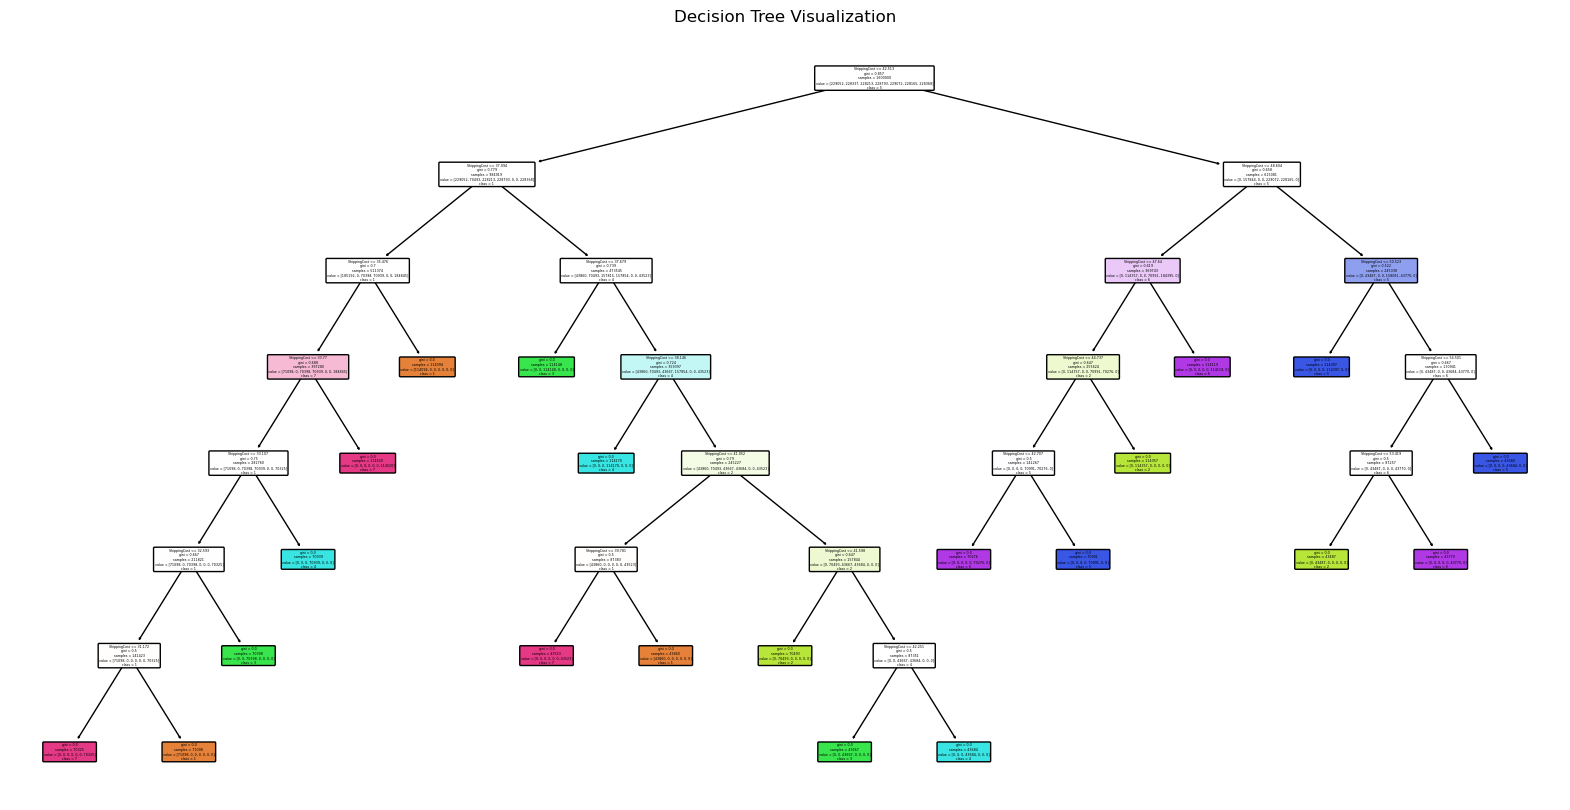

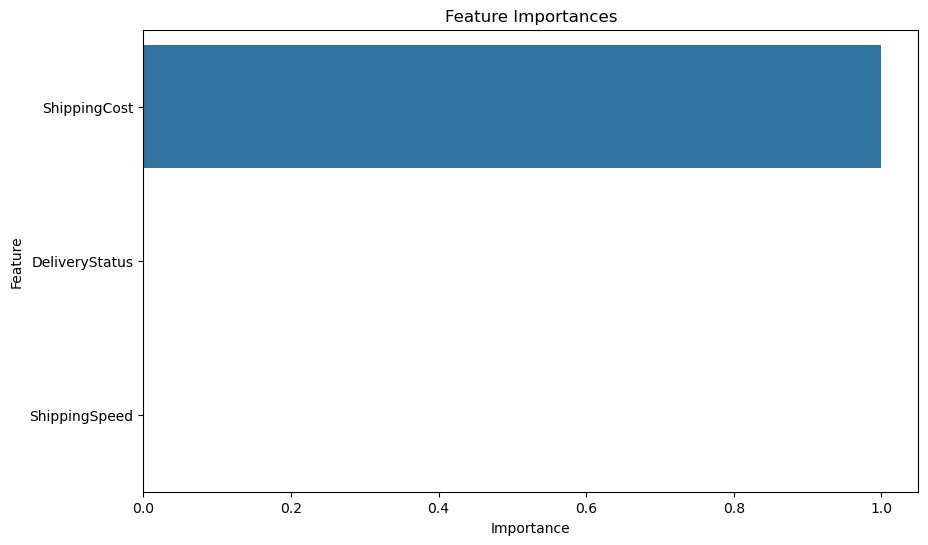

In [118]:
# Visualizar el árbol de decisión
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(dt_clf, feature_names=features_dt, class_names=[str(x) for x in dt_clf.classes_], filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

# Obtener las variables más importantes
importances = dt_clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Visualizar las variables más importantes
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=np.array(features_dt)[indices])
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:

# Visualizar la relación entre el costo y la velocidad de envío
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ShippingCost', y='ShippingSpeed', hue='PreferredCompanyID', data=merged_df)
plt.title('Relationship between Cost and Shipping Speed')
plt.xlabel('Shipping Cost')
plt.ylabel('Shipping Speed')
plt.show()

# Visualizar la relación entre el costo y el peso
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ShippingCost', y='Weight', hue='PreferredCompanyID', data=merged_df)
plt.title('Relationship between Cost and Weight')
plt.xlabel('Shipping Cost')
plt.ylabel('Weight')
plt.show()

# Visualizar la relación entre el costo y las dimensiones
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ShippingCost', y='Dimensions', hue='PreferredCompanyID', data=merged_df)
plt.title('Relationship between Cost and Dimensions')
plt.xlabel('Shipping Cost')
plt.ylabel('Dimensions')
plt.show()

# Visualizar el costo por compañía con características específicas
plt.figure(figsize=(10, 6))
sns.boxplot(x='CompanyID', y='ShippingCost', hue='PreferredCompanyID', data=merged_df)
plt.title('Cost by Company with Specific Characteristics')
plt.xlabel('CompanyID')
plt.ylabel('Shipping Cost')
plt.show()


# Relación entre Costo, Peso, Dimensiones y Velocidad de envío
plt.figure(figsize=(12, 8))
sns.scatterplot(x='ShippingCost', y='Weight', hue='ShippingSpeed', size='Dimensions', data=merged_df, palette='viridis', alpha=0.6)
plt.title('Relación entre Costo, Peso, Dimensiones y Velocidad de envío')

plt.tight_layout()
plt.show()

In [108]:
##RED NEURONAL

import pandas as pd
import numpy as np
from faker import Faker
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, log_loss, cohen_kappa_score
import seaborn as sns
import matplotlib.pyplot as plt

## Cargar las bases primero
customers_df = pd.read_excel("Customers_DB.xlsx")
packages_df = pd.read_csv("Packages_DB.csv")
shipping_companies_df = pd.read_excel("ShippingComp_DB.xlsx")
preferences_df = pd.read_excel("Preferences_DB.xlsx")

# Merge packages_df with shipping_companies_df based on 'CompanyID'
merged_df = pd.merge(packages_df, shipping_companies_df, on='CompanyID', how='left')

# Merge the merged_df with customers_df on 'ReceiverID'
merged_df = pd.merge(merged_df, customers_df, left_on='ReceiverID', right_on='CustomerID', how='left')

# Calculate proportional cost difference based on CompanyID
cost_difference_mapping = merged_df.groupby('CompanyID')['ShippingCost'].mean()
merged_df['CostDifference'] = merged_df['CompanyID'].map(cost_difference_mapping)
merged_df['CostDifference'] = merged_df['CostDifference'] * np.random.uniform(0.8, 1.2)

# Apply the proportional cost difference to ShippingCost
merged_df['ShippingCost'] = merged_df['ShippingCost'] + merged_df['CostDifference']

# Assume the target variable is the preferred shipping company for each customer
# Predict based on the best cost, speed, and delivery status
preferred_company_indices = merged_df.groupby('PackageID')['ShippingCost'].idxmin()
merged_df['PreferredCompanyID'] = merged_df.loc[preferred_company_indices, 'CompanyID'].values
merged_df['PreferredCompanyID'] = np.where(merged_df['ShippingSpeed'] == 'Express', merged_df['PreferredCompanyID'], merged_df['CompanyID'])

# Features for the neural network, excluding 'PreferredCompanyID'
features_nn = ['ShippingCost', 'ShippingSpeed', 'DeliveryStatus']

# Drop rows with NaN values in the features and target variable
merged_df = merged_df.dropna(subset=features_nn + ['PreferredCompanyID'])

# Encode categorical feature 'ShippingSpeed'
le = LabelEncoder()
merged_df['ShippingSpeed'] = le.fit_transform(merged_df['ShippingSpeed'])

# Map 'On Time' as 2, 'Delayed' as 1, and 'Lost' as 0 for 'DeliveryStatus'
merged_df['DeliveryStatus'] = merged_df['DeliveryStatus'].map({'On Time': 2, 'Delayed': 1, 'Lost': 0})

# Split the data into training and testing sets
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(
    merged_df[features_nn], merged_df['PreferredCompanyID'], test_size=0.2, random_state=42)

# Train a neural network classifier
nn_clf = MLPClassifier(random_state=42, max_iter=500)
nn_clf.fit(X_train_nn, y_train_nn)

# Make predictions on the test set
y_pred_nn = nn_clf.predict(X_test_nn)

# Evaluate the accuracy of the neural network
accuracy_nn = accuracy_score(y_test_nn, y_pred_nn)
conf_matrix_nn = confusion_matrix(y_test_nn, y_pred_nn)

# Display the results
print(f"Neural Network Accuracy: {accuracy_nn}")
print("Confusion Matrix (Neural Network):")
print(conf_matrix_nn)

# Otras métricas para la red neuronal
precision_nn = precision_score(y_test_nn, y_pred_nn, average='weighted')
recall_nn = recall_score(y_test_nn, y_pred_nn, average='weighted')
f1_nn = f1_score(y_test_nn, y_pred_nn, average='weighted')
roc_auc_nn = roc_auc_score(y_test_nn, nn_clf.predict_proba(X_test_nn), multi_class='ovr', average='weighted')
log_loss_nn = log_loss(y_test_nn, nn_clf.predict_proba(X_test_nn))
cohen_kappa_nn = cohen_kappa_score(y_test_nn, y_pred_nn)

# Mostrar las métricas adicionales para la red neuronal
print(f"Neural Network Precision: {precision_nn}")
print(f"Neural Network Recall: {recall_nn}")
print(f"Neural Network F1-Score: {f1_nn}")
print(f"Neural Network ROC-AUC: {roc_auc_nn}")
print(f"Neural Network Log Loss: {log_loss_nn}")
print(f"Neural Network Cohen's Kappa: {cohen_kappa_nn}")


Neural Network Accuracy: 0.3980725
Confusion Matrix (Neural Network):
[[17880  5454  1835  3704     0     0 28824]
 [    0 19965  2934  5857  4852 23731     0]
 [    0 10983 14637     0     0     0 31461]
 [    0 10741  9412 19618     0     0 17049]
 [    0 17577     0     0  6619 32930     0]
 [    0 17761     0     0  4655 34767     0]
 [ 1845     0  5483  3683     0     0 45743]]


In [1]:
git clone https://github.com/pyinstaller/pyinstaller
cd pyinstaller
pip install .

SyntaxError: invalid syntax (1221138486.py, line 1)